# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/week_02


# Import data


In [3]:
# Load input data, stock-driven model:
# and check your data

file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="stock_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    61 non-null     int64  
 2   inflow   0 non-null      float64
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,20,NaN,NaN
1991,21,NaN,NaN
1992,30,NaN,NaN
1993,39,NaN,NaN
1994,45,NaN,NaN
...,...,...,...
2046,724,NaN,NaN
2047,737,NaN,NaN
2048,750,NaN,NaN


In [5]:
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


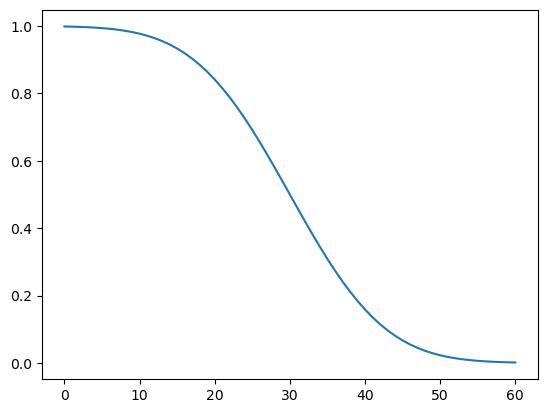

In [6]:
# Normal distribution
curve_surv = norm.sf(timesteps, loc=30, scale=10)

plt.plot(curve_surv)
plt.show()

# Survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [7]:
# create survival curve matrix filled with zeros
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for time in timesteps:
    # at each iteration, we shift the survival curve
    shifted_curve_surv = curve_surv[0 : time_max - time]
    # and we fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = shifted_curve_surv

curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


# Stock driven model


In [8]:
# This is our model input (together with the curve_surv_matrix)
stock = data["stock"]
stock

year
1990     20
1991     21
1992     30
1993     39
1994     45
       ... 
2046    724
2047    737
2048    750
2049    763
2050    776
Name: stock, Length: 61, dtype: int64

The stock-driven equation is:

$$
\textcolor{#20B2AA}{\text{inflow}(y)} = \frac{\textcolor{#DAA520}{\text{stock}(y)} - \sum_{t=y_0}^{y-1} [\textcolor{#20B2AA}{\text{inflow}(t)} \times \textcolor{#9370DB}{\text{surv}(y-t)]}}{\textcolor{#9370DB}{\text{surv}(0)}}
$$


If we remember that:

- $\textcolor{#9370DB}{\text{surv}(0)}$ is also the value on the diagonal of the `curve_surv_matrix`,

and using pandas notation we get:

$$
\textcolor{#20B2AA}{\text{inflow.iloc[time]}} = \frac{\textcolor{#DAA520}{\text{stock.iloc[time]}} - \sum_{\text{t}=0}^{\text{time}-1}  \textcolor{#38761d}{\text{cohort}\textunderscore\text{matrix.loc[time, t]}}}{\textcolor{#9370DB}{\text{survival}\textunderscore\text{curve}\textunderscore\text{matrix.iloc[time, time]}}}
$$

$$
\textcolor{#20B2AA}{\text{inflow.iloc[time]}} = \frac{\textcolor{#DAA520}{\text{stock.iloc[time]}} - \textcolor{#38761d}{\text{cohort}\textunderscore\text{matrix.loc[time, :time-1]}}\text{.sum()} }{\textcolor{#9370DB}{\text{survival}\textunderscore\text{curve}\textunderscore\text{matrix.iloc[time, time]}}}
$$


## Inflows and cohort matrix


In [9]:
# create inflow series and survival matrix filled with zeros
inflows = pd.Series(0, index=years, dtype=float)
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populating them
for time in timesteps:
    # we calculate the inflow of the time-th year
    inflows.iloc[time] = (
        stock.iloc[time] - cohort_surv_matrix.loc[time, : time - 1].sum()
    ) / curve_surv_matrix.loc[time, time]
    # and we scale the shifted survival curve with the inflow
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

cohort_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19.989668,1.010332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,19.975863,1.009810,9.014327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19.957601,1.009113,9.009670,9.023616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,19.933685,1.008190,9.003448,9.018954,6.035723,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.093350,0.006282,0.073995,0.096901,0.084031,0.090334,0.024311,0.031255,1.730991,0.587510,...,28.571506,28.975584,29.373033,29.767481,30.161963,30.558917,0.000000,0.000000,0.000000,0.000000
57,0.069433,0.004716,0.056052,0.074071,0.064815,0.070304,0.019090,0.024761,1.383458,0.473672,...,28.514354,28.930506,29.337833,29.740268,30.141133,30.543130,30.948345,0.000000,0.000000,0.000000
58,0.051172,0.003508,0.042074,0.056109,0.049545,0.054228,0.014857,0.019444,1.096018,0.378573,...,28.441715,28.872637,29.292192,29.704628,30.113579,30.522036,30.932357,31.346289,0.000000,0.000000
59,0.037367,0.002585,0.031295,0.042118,0.037530,0.041452,0.011460,0.015132,0.860642,0.299917,...,28.350309,28.799085,29.233599,29.658416,30.077492,30.494134,30.910995,31.330095,31.752860,0.000000


<Axes: xlabel='year', ylabel='year'>

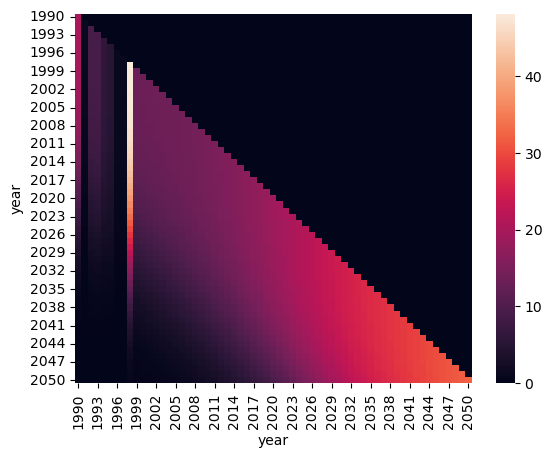

In [10]:
# set index and columns to years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# and visualize the cohort_surv_matrix matrix with a heatmap
sns.heatmap(cohort_surv_matrix, annot=False)

## Net addition to stock


$$\text{NAS}(y) = \text{stock}(y) - \text{stock}(y-1)$$


In [11]:
# calculate the net addition to stock
nas = np.diff(stock, prepend=0)  # prepending 0 assumes no initial stock
nas

array([20,  1,  9,  9,  6,  5,  1,  1, 48, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

## Outflows


$$\text{outflow}(y) = \text{inflow}(y) - \text{NAS}(y)$$


In [12]:
# calculate outflows and nas:
outflows = inflows - nas
outflows

year
1990     0.027034
1991     0.011698
1992     0.026512
1993     0.035813
1994     0.043882
          ...    
2046    17.600224
2047    17.990179
2048    18.388660
2049    18.795781
2050    19.211350
Length: 61, dtype: float64

## Putting it together


In [13]:
# Load input data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="stock_driven")

# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Create the survival curve
curve_surv = norm.sf(timesteps, loc=30, scale=10)

# create the survival curve matrix
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # Fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = curve_surv[0 : time_max - time]

# Define the input for the stock-driven model
stock = data["stock"]

# create inflow series and survival matrix filled with zeros and populate them
inflows = pd.Series(0, index=years, dtype=float)
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # we calculate the inflow of the time-th year
    inflows.iloc[time] = (
        stock.iloc[time] - cohort_surv_matrix.loc[time, : time - 1].sum()
    ) / curve_surv_matrix.loc[time, time]
    # and we scale the shifted survival curve with the inflow
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

# set index and columns to years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# Compute nas, and outflows
data["inflow"] = inflows
data["nas"] = np.diff(data["stock"], prepend=0)
data["outflow"] = data["inflow"] - data["nas"]

data

,stock,inflow,outflow,nas
year,,,,
1990,20,20.027034,0.027034,20
1991,21,1.011698,0.011698,1
1992,30,9.026512,0.026512,9
1993,39,9.035813,0.035813,9
1994,45,6.043882,0.043882,6
...,...,...,...,...
2046,724,30.600224,17.600224,13
2047,737,30.990179,17.990179,13
2048,750,31.388660,18.388660,13


# Visualize the results


<Axes: xlabel='year'>

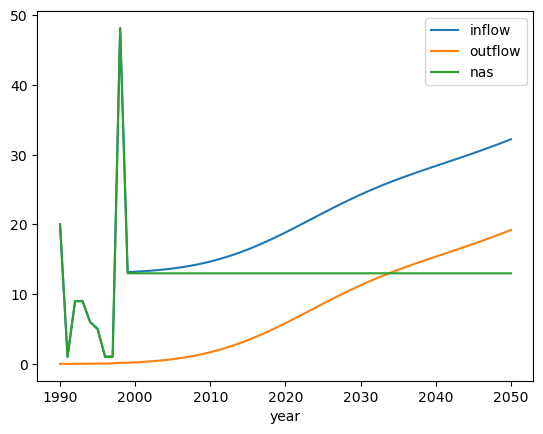

In [14]:
# Plot the evolution of the inflows, outflows and net addition to stock over time
data[["inflow", "outflow", "nas"]].plot()

<Axes: xlabel='year'>

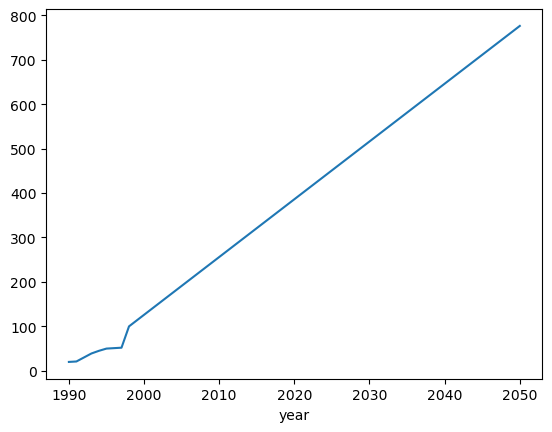

In [15]:
# Plot the evolution of the stock over time
data["stock"].plot()

<Axes: xlabel='year'>

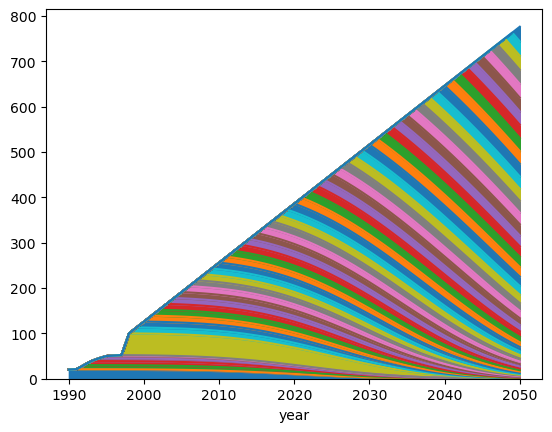

In [16]:
# Visualize the stock by cohort_surv_matrixs
cohort_surv_matrix.plot(kind="area", stacked=True, legend=False)

# Export output data to Excel


In [17]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data_output" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="stock_driven")

In [18]:
# But we also want to save the cohort_surv_matrix data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort_surv_matrix.to_excel(writer, sheet_name="cohort_surv_matrix_stock_driven")

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
